In [0]:
# Import libraries necessary for this project
import sys
import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
# Import training data
xlsx = pd.ExcelFile('Data_Train.xlsx')
df = pd.read_excel(xlsx)

In [0]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [0]:
df.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


In [0]:
df.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [0]:
# Create function for change str to float
f1 = lambda x: x.strip('₹')
f2 = lambda x: x.replace('for','181.79')
f3 = lambda x: x.replace(",","")
f4 = lambda x: float(x)
f5 = lambda x: x.replace('-','3.416441')
f6 = lambda x: x.replace('NEW','3.416441')
f7 = lambda x: x.replace('Opening Soon','3.416441')
f8 = lambda x: x.replace('Temporarily Closed','3.416441')
f9 = lambda x: x.replace(' minutes','')
f10 = lambda x: x.replace('-','199.294754')
f11 = lambda x: x.replace('-','98.083919')

In [0]:
# Apply function on pandas.series
df.Average_Cost = df.Average_Cost.apply(f1)
df.Average_Cost = df.Average_Cost.apply(f2)
df.Average_Cost = df.Average_Cost.apply(f3)
df.Average_Cost = df.Average_Cost.apply(f4)

In [0]:
df.Minimum_Order = df.Minimum_Order.apply(f1)
df.Minimum_Order = df.Minimum_Order.apply(f3)
df.Minimum_Order = df.Minimum_Order.apply(f4)

In [0]:
df.Rating = df.Rating.apply(f5)
df.Rating = df.Rating.apply(f6)
df.Rating = df.Rating.apply(f7)
df.Rating = df.Rating.apply(f8)
df.Rating = df.Rating.apply(f4)

In [0]:
df.Votes = df.Votes.apply(f10)
df.Votes = df.Votes.apply(f4)

In [0]:
df.Reviews = df.Reviews.apply(f11)
df.Reviews = df.Reviews.apply(f4)

In [0]:
df.Delivery_Time = df.Delivery_Time.apply(f9)
df.Delivery_Time = df.Delivery_Time.apply(f4)

In [0]:
# Show data frame fillter by having the same Restaurant id
x = df.Restaurant.value_counts()[df.Restaurant.value_counts()>1]
x = pd.DataFrame(x)
df[df.Restaurant.isin(x.index)].sort_values(by='Restaurant') 

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
814,ID_1004,"Rmz Centennial, I Gate, Whitefield",Street Food,50.0,50.0,3.416441,199.294754,98.083919,30.0
6568,ID_1004,"Sector 3, Marathalli",Street Food,50.0,50.0,3.416441,199.294754,98.083919,30.0
9216,ID_1004,"Sandhurst Road, Mumbai CST Area","Fast Food, Sandwich",100.0,50.0,3.000000,4.000000,1.000000,30.0
261,ID_1004,Mumbai Central,"Fast Food, Sandwich",100.0,50.0,3.000000,4.000000,1.000000,30.0
6496,ID_1006,"Sandhurst Road, Mumbai CST Area",Lebanese,100.0,50.0,3.700000,60.000000,23.000000,30.0
...,...,...,...,...,...,...,...,...,...
5979,ID_992,"Delhi Administration Flats, Timarpur","Asian, Japanese, Korean, Chinese, Momos, Thai",600.0,50.0,4.400000,1990.000000,1091.000000,30.0
1567,ID_996,"Dockyard Road, Mumbai CST Area",Desserts,50.0,50.0,3.416441,199.294754,98.083919,45.0
2190,ID_996,"Sandhurst Road, Mumbai CST Area",Desserts,50.0,50.0,3.416441,199.294754,98.083919,45.0
7179,ID_999,"Sector 14, Noida","North Indian, Chinese, Continental, Italian",350.0,99.0,4.000000,1389.000000,888.000000,65.0


In [0]:
# Label encoder order is alphabetical
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#df['Location'] = labelencoder_X.fit_transform(df['Location'])
#df['Cuisines'] = labelencoder_X.fit_transform(df['Cuisines'])

In [0]:
df.describe()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000
mean,202.707030,53.344511,3.578599,236.085120,118.003698,37.056066
std,129.833411,18.551245,0.383342,500.831242,285.801524,12.447496
min,50.000000,0.000000,2.100000,3.000000,1.000000,10.000000
25%,100.000000,50.000000,3.400000,26.000000,11.000000,30.000000
50%,200.000000,50.000000,3.500000,106.000000,48.000000,30.000000
75%,200.000000,50.000000,3.800000,199.294754,98.083919,45.000000
max,2050.000000,500.000000,4.900000,9054.000000,6504.000000,120.000000


In [0]:
df.tail()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",250.0,50.0,4.200000,326.000000,189.000000,30.0
11090,ID_4620,"Sector 14, Noida",Fast Food,100.0,50.0,3.600000,36.000000,16.000000,30.0
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",100.0,50.0,3.500000,45.000000,18.000000,30.0
11092,ID_4115,"Sector 3, Marathalli",North Indian,100.0,50.0,3.100000,24.000000,9.000000,30.0
11093,ID_4417,"Sector 63A,Gurgaon",North Indian,100.0,50.0,3.416441,199.294754,98.083919,30.0


In [0]:
# Calculate correlation
set_option('precision', 2)
df.corr(method='pearson') # data frame correlation

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
Average_Cost,1.00,0.12,0.38,0.44,0.45,0.18
Minimum_Order,0.12,1.00,0.08,0.12,0.12,0.25
Rating,0.38,0.08,1.00,0.45,0.43,0.16
Votes,0.44,0.12,0.45,1.00,0.96,0.20
Reviews,0.45,0.12,0.43,0.96,1.00,0.17
Delivery_Time,0.18,0.25,0.16,0.20,0.17,1.00


<function matplotlib.pyplot.show>

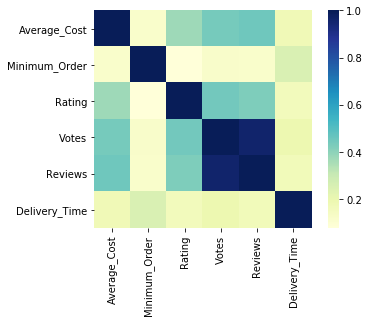

In [0]:
#library to establish correlation
import seaborn as sns
names = []
#creating a correlation matrix
correlations_ps = df.corr()
sns.heatmap(correlations_ps,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show

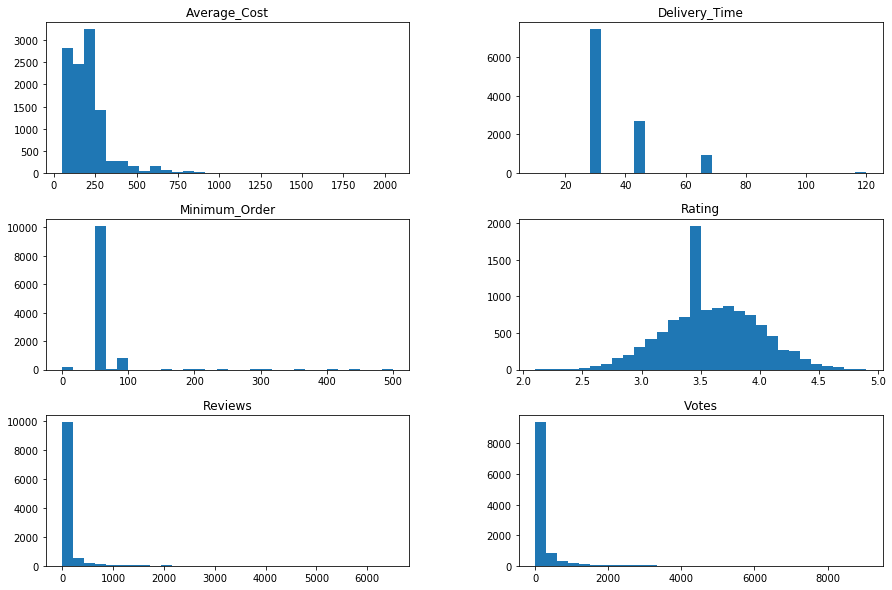

In [0]:
# Plot histogram
df.hist(bins=30,figsize=(15,10),grid=False);

In [0]:
# Select only numerical data
df = df[['Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time']]

In [0]:
df.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,200.0,50.0,3.5,12.0,4.0,30.0
1,100.0,50.0,3.5,11.0,4.0,30.0
2,150.0,50.0,3.6,99.0,30.0,65.0
3,250.0,99.0,3.7,176.0,95.0,30.0
4,200.0,99.0,3.2,521.0,235.0,65.0


In [0]:
# Calculate Z-score for outlier
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

In [0]:
# Normalize by using log (+1 for avoid log0)
df = np.log(df + 1)

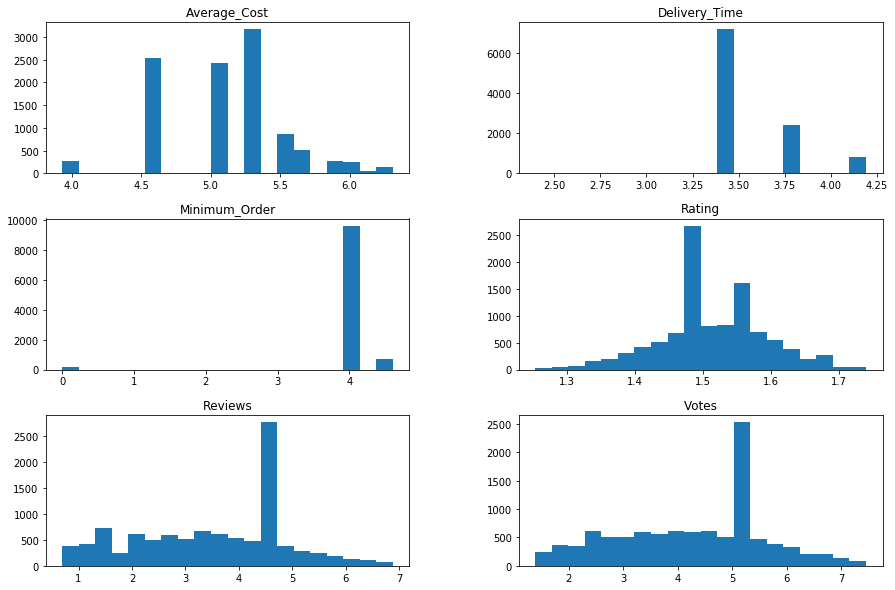

In [0]:
# Plot histogram after clean outlier and normalize
df.hist(bins=20,figsize=(15,10),grid=False);

In [0]:
# Select x and y to train model
x_train = df[['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews']]
y_train = df['Delivery_Time']

In [0]:
# Import test data
xlsx = pd.ExcelFile('Data_Test.xlsx')
df_test = pd.read_excel(xlsx)

In [0]:
# Clean str data in test
df_test.Average_Cost = df_test.Average_Cost.apply(f1)
df_test.Average_Cost = df_test.Average_Cost.apply(f2)
df_test.Average_Cost = df_test.Average_Cost.apply(f3)
df_test.Average_Cost = df_test.Average_Cost.apply(f4)
df_test.Minimum_Order = df_test.Minimum_Order.apply(f1)
df_test.Minimum_Order = df_test.Minimum_Order.apply(f3)
df_test.Minimum_Order = df_test.Minimum_Order.apply(f4)
df_test.Rating = df_test.Rating.apply(f5)
df_test.Rating = df_test.Rating.apply(f6)
df_test.Rating = df_test.Rating.apply(f7)
df_test.Rating = df_test.Rating.apply(f8)
df_test.Rating = df_test.Rating.apply(f4)
df_test.Votes = df_test.Votes.apply(f10)
df_test.Votes = df_test.Votes.apply(f4)
df_test.Reviews = df_test.Reviews.apply(f11)
df_test.Reviews = df_test.Reviews.apply(f4)

In [0]:
# Select only the same features as training data
x_test = df_test[['Average_Cost', 'Minimum_Order',
                  'Rating', 'Votes', 'Reviews']]

In [0]:
# Take log
x_test = np.log(x_test + 1)

In [0]:
# Create linear regession model
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [0]:
# Prediction
pred_y = model.predict(x_test)
pred_y = np.exp(pred_y) - 1

In [0]:
# Round pred_y to 5 or 10
for i in range(len(pred_y)):
  if (pred_y[i]%5 >= 2.5):
    pred_y[i] = pred_y[i] + (5-pred_y[i]%5)
  else:
    pred_y[i] = pred_y[i] - (pred_y[i]%5)


In [0]:
# Create submission data frame and change data type to str
predict_df = pd.DataFrame()
predict_df['Restaurant'] = df_test['Restaurant']
predict_df['Delivery_Time'] = pred_y
predict_df = predict_df.astype('str')

In [0]:
# Function to change predicted data to the same form as original data
f13 = lambda x: x.replace('.0',' minutes')

In [0]:
# Apply function
predict_df.Delivery_Time = predict_df.Delivery_Time.apply(f13)

In [0]:
predict_df

,Restaurant,Delivery_Time
0,ID_2842,40 minutes
1,ID_730,35 minutes
2,ID_4620,35 minutes
3,ID_5470,35 minutes
4,ID_3249,35 minutes
...,...,...
2769,ID_6342,35 minutes
2770,ID_8495,35 minutes
2771,ID_7122,35 minutes
2772,ID_2475,30 minutes


In [0]:
# Save to excel
predict_df.to_excel('submission.xlsx',  sheet_name='Sheet1', index=False)